# Opens fits files and displays info, works with csvs to produce location plots etc.

In [1]:
# Call the relevant python packages

%matplotlib notebook

import math
import numpy as np
import pandas as pd
import glob, os
import nway

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from astropy import units as u
from astropy.io import ascii, fits
from astropy.table import join, hstack, Table, Column, vstack
from astropy.coordinates import Angle, Latitude, Longitude, SkyCoord

# Set colour palette & plot layouts
import seaborn as sns     #; sns.set()
sns.set_context("paper")   # "paper", "notebook", "talk", "poster"

# Fits Files

In [3]:
# Open a fits file and display info
filein = 'mean_36_45_combined.fits'
fits_im = fits.open(filein)
fits_im.info()

# Print data
data = fits_im[1].data
print(len(data))
print(data[0:2])

Filename: mean_36_45_combined.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   ()      
  1  NWAYMATCH     1 BinTableHDU    147   2244R x 69C   [7A, D, D, D, D, 7A, D, D, D, D, 7A, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D, J, J, D, D, 7A, D, D, D, D, 7A, D, D, D, D, 7A, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D, J, J, D, D, E, E, I, E, E, E, E, E, I]   
2244
[('4', 10.63474437, 40.80952701, 17.83750491, 0.0578, '2198', 10.63477422, 40.80952861, 17.47950491, 0.0543, '-99', -99., -99., -99., -99., 0.08153871, nan, nan, 0.08153871, 2, 12.556664, 12.556664, 0.99174935, 0.99174935, 0.99174935, 1.       , 1, 2, 10.6347593 , 40.80952781, '-99', -99., -99., -99., -99., '-99', -99., -99., -99., -99., '-99', -99., -99., -99., -99., -99., -99., -99., -99., -99, -99., -99., -99., -99., -99., -99., -99, -99, -99., -99., nan, 0., 1, 0., 1., 1., 0., 0., 1)
 ('5', 10.67779713, 40.76106935, 16.57750491, 0.037 , '788', 10.67780252, 40.7610

In [4]:
# Print fits header fields
hdr = fits_im[1].header
hdr

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  482 / length of dimension 1                          
NAXIS2  =                 2244 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   69 / number of table fields                         
TTYPE1  = 'S1_ALL_ID'                                                           
TFORM1  = '7A      '                                                            
TTYPE2  = 'S1_ALL_S1_F1_RA'                                                     
TFORM2  = 'D       '                                                            
TTYPE3  = 'S1_ALL_S1_F1_DEC'

# Convert fits to text

In [5]:
text_file = open('mean_36_45_combined.txt','w')
for i in range(8,len(hdr)-1,2):
    name = str(hdr[i])+' '
    print(name)
    text_file.write(name)
    
for i in range(len(data)):
    line = '\n'+str(data[i])[1:len(str(data[i]))-1]+' '
    text_file.write(line)
    
text_file.close()

S1_ALL_ID 
S1_ALL_S1_F1_RA 
S1_ALL_S1_F1_DEC 
S1_ALL_S1_F1_MAG1_1 
S1_ALL_S1_F1_ERR1_1 
S1_ALL_S1_F3_ID 
S1_ALL_S1_F3_RA 
S1_ALL_S1_F3_DEC 
S1_ALL_S1_F3_MAG1_3 
S1_ALL_S1_F3_ERR1_3 
S1_ALL_S1_F4_ID 
S1_ALL_S1_F4_RA 
S1_ALL_S1_F4_DEC 
S1_ALL_S1_F4_MAG1_4 
S1_ALL_S1_F4_ERR1_4 
S1_ALL_Separation_S1_F3_S1_F1 
S1_ALL_Separation_S1_F4_S1_F1 
S1_ALL_Separation_S1_F4_S1_F3 
S1_ALL_Separation_max 
S1_ALL_ncat 
S1_ALL_dist_bayesfactor 
S1_ALL_dist_bayesfactor_corrected 
S1_ALL_dist_post 
S1_ALL_p_single 
S1_ALL_p_any 
S1_ALL_p_i 
S1_ALL_match_flag 
S1_ALL_36_asn 
S1_ALL_RA 
S1_ALL_DEC 
S2_ALL_ID 
S2_ALL_S2_F1_RA 
S2_ALL_S2_F1_DEC 
S2_ALL_S2_F1_MAG2_1 
S2_ALL_S2_F1_ERR2_1 
S2_ALL_S2_F3_ID 
S2_ALL_S2_F3_RA 
S2_ALL_S2_F3_DEC 
S2_ALL_S2_F3_MAG2_3 
S2_ALL_S2_F3_ERR2_3 
S2_ALL_S2_F4_ID 
S2_ALL_S2_F4_RA 
S2_ALL_S2_F4_DEC 
S2_ALL_S2_F4_MAG2_4 
S2_ALL_S2_F4_ERR2_4 
S2_ALL_Separation_S2_F3_S2_F1 
S2_ALL_Separation_S2_F4_S2_F1 
S2_ALL_Separation_S2_F4_S2_F3 
S2_ALL_Separation_max 
S2_ALL_ncat 
S2_ALL_dist_

# Match visualisation (ignores sky curvature)

0.24520263593797173 arcsec
5.555555555555556e-05 deg


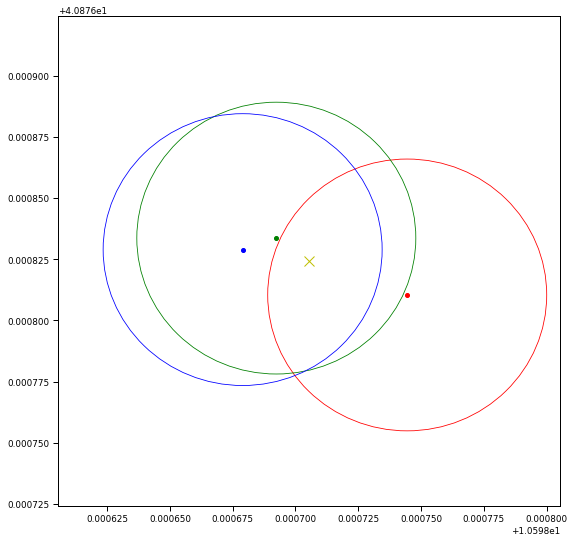

In [6]:
%matplotlib inline
plt.figure(figsize=(9,9))
x1,y1 = 10.5987445,40.87681039
x2,y2 = 10.59869237,40.87683363
x3,y3 = 10.59867896,40.87682893
sep13 = math.sqrt((x3-x1)**2 + (y3-y1)**2) * u.degree
sep13 = sep13.to(u.arcsec)
print(sep13)
plt.plot(x1,y1,'ro',ms=4)
plt.plot(x2,y2,'go',ms=4)
plt.plot(x3,y3,'bo',ms=4)
stretch = 0.0001
x_mean = (x1+x2+x3)/3
y_mean = (y1+y2+y3)/3
plt.plot(x_mean,y_mean,'yx',ms=10)
plt.xlim(x_mean-stretch,x_mean+stretch)
plt.ylim(y_mean-stretch,y_mean+stretch)

ax = plt.gca()
radius = 0.2*u.arcsec
radius = radius.to(u.deg)
print(radius)
circle1 = plt.Circle((x1,y1), radius.value, color='red', fill=False) #max allowed radius
circle2 = plt.Circle((x2,y2), radius.value, color='green', fill=False) #actual separation
circle3 = plt.Circle((x3,y3), radius.value, color='blue', fill=False) #actual separation

ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)

# Catalogue Operations

In [10]:
# Define function to produce 3D graph
# NB: ONLY WORKS FOR CSV FILES!!
def graph(file,filtr,epoch,var):
    # Setting up figure
    plt.rc('font', family='sans-serif')
    #plt.rc("xtick", labelsize=8)
    #plt.rc("ytick", labelsize=8)
    plt.rc("axes", labelsize=10)
    plt.rc("legend", fontsize=11)
    plt.figure(figsize=(6,6))
    #ax = plt.gca()                        # Sets up active plot region
    ax = plt.axes(projection='3d')
    
    # Make the actual plot
    data = ascii.read(file, data_start=1)
    ax.plot3D(data['RA'], data['DEC'], data[var], '.', color='black', ms=0.5, label="M32 All")
    ax.set_xlabel('RA')
    ax.set_ylabel('DEC')
    ax.set_zlabel(var)
    #plt.xlabel('RA', size=18)
    #plt.ylabel('DEC', size=18)
    #plt.zlabel(var, size=18)
    #plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    #plt.title(filtr+'-'+epoch,fontsize=18)
    
    # Plot a box
    #x1,y1=[maxRA.value,minRA.value],[minDec.value,minDec.value]
    #x2,y2=[minRA.value,minRA.value],[minDec.value,maxDec.value]
    #x3,y3=[minRA.value,maxRA.value],[maxDec.value,maxDec.value]
    #x4,y4=[maxRA.value,maxRA.value],[maxDec.value,minDec.value]
    #plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='black')
    
    #plt.savefig("blah.pdf", bbox_inches='tight')
    #plt.tight_layout()
    #plt.show()
    #plt.close()

<IPython.core.display.Javascript object>


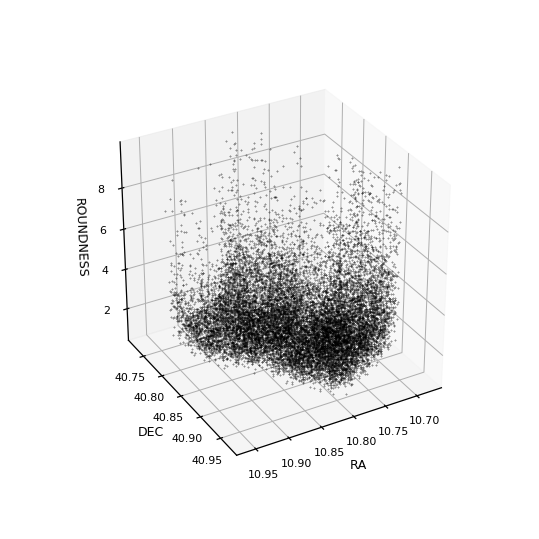

In [11]:
graph('MAG_S1_0.csv','36','background','ROUNDNESS')
#graph(csvfile,'36','background','SHARPNESS')
#graph(csvfile,'36','background','MAG1')
#graph(csvfile,'36','background','ERR1')

In [17]:
# Define function to produce location plot
def loc_plot(file,filtr,epoch):
    %matplotlib inline
    # Setting up figure
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=14)
    plt.rc("ytick", labelsize=14)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=11)
    plt.figure(figsize=(9,9))
    ax = plt.gca()                        # Sets up active plot region
    
    # Make the actual plot
    data = ascii.read(file, data_start=1)
    plt.plot(data['RA'], data['DEC'], '.', color='black', ms=0.2, label="M32 All")    
    plt.xlabel('Right Ascension (deg)', size=18)
    plt.ylabel('Declination (deg)', size=18)
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title(filtr+'-'+epoch,fontsize=18)
    
    # Plot a box
    #x1,y1=[maxRA.value,minRA.value],[minDec.value,minDec.value]
    #x2,y2=[minRA.value,minRA.value],[minDec.value,maxDec.value]
    #x3,y3=[minRA.value,maxRA.value],[maxDec.value,maxDec.value]
    #x4,y4=[maxRA.value,maxRA.value],[maxDec.value,minDec.value]
    #plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='black')
    
    #plt.savefig("blah.pdf", bbox_inches='tight')
    plt.tight_layout()
    plt.show()
    plt.close()

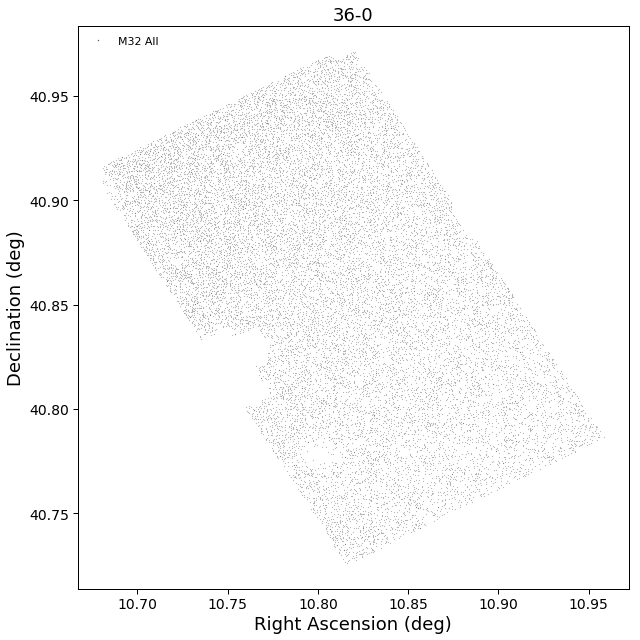

In [18]:
# Show location plot of background 36 field
loc_plot('MAG_S1_0.csv','36','0')

In [27]:
#print column names
data_36.colnames

['RA', 'DEC', 'ROUNDESS', 'SHARPNESS', 'MAG1', 'ERR1']

In [4]:
file = 'mean_36_45_combined.csv'
csv_data = ascii.read(file, header_start=0)
csv_data.colnames   # Get the column names
print("Number of rows:",len(csv_data))

# Cull all those matches with a match flag !=1    
good_match_idx = np.where(csv_data['match_flag']==1)
good_data = csv_data[good_match_idx]
print("Amount of good match data:",len(good_data))

# See how many remain compared to original combined [3.6]/[4.5]
match_1_pct = len(good_data)*100/len(csv_data)
print("Percentage of good match data: ",match_1_pct,"%")

# Set up columns for association number and mean coordinates
good_data['asn']=0
good_data['mean_RA']=0.0
good_data['mean_DEC']=0.0

for i in range(len(good_data)):
    associations = 1
    RA = good_data['S1_ALL_RA'][i]
    DEC = good_data['S1_ALL_DEC'][i]
    
    # -99 means no match, so ignore these coordinates
    if good_data['S2_ALL_RA'][i]!=-99:
        RA = RA + good_data['S2_ALL_RA'][i]
        DEC = DEC + good_data['S2_ALL_DEC'][i]
        associations = associations + 1
    #if good_data['S2_F4_RA'][i]!=-99:
    #    RA = RA + good_data['S2_F4_RA'][i]
    #    DEC = DEC + good_data['S2_F4_DEC'][i]
    #    associations = associations + 1
        
    good_data['asn'][i]=associations
    good_data['mean_RA'][i]=RA/associations
    good_data['mean_DEC'][i]=DEC/associations
    
#asn_3_idx = np.where(good_data['45_asn']==3)
#print("3 out of 3 associations:",len(asn_3_idx[0]))
asn_2_idx = np.where(good_data['asn']==2)
print("2 out of 2 associations",len(asn_2_idx[0]))
idx_asn = np.where(good_data['asn']!=1)
# Cull those with no counterparts (no variability)
print("This number should be the sum of the two above:",len(idx_asn[0]))
good_asn_data = good_data[idx_asn]
# See how many remain compared to original combined [3.6]/[4.5]
good_asn_pct = 100*len(good_asn_data)/len(csv_data)
print("Amount of good match data with counterpart(s): ",good_asn_pct,"%")

# Rename 1st ID as ID
#good_asn_data.rename_column('S2_F1_ID', 'ID')

# Remove first and last characters of ID number ('')
col_change_list = ['S1_ALL_ID','S1_ALL_S1_F3_ID','S1_ALL_S1_F4_ID','S2_ALL_ID','S2_ALL_S2_F3_ID','S2_ALL_S2_F4_ID']
for i in range(len(good_asn_data)):
    for j in range(len(col_change_list)):
        good_asn_data[col_change_list[j]][i]=int(str(good_asn_data[col_change_list[j]][i])[1:len(str(good_asn_data[col_change_list[j]][i]))-1])

# Rename (ID, RA, Dec)1 as (ID, RA, Dec)
#good_data.rename_column('S2_F1_ID', 'ID')
#good_data.rename_column('S2_F1_RA', 'RA')
#good_data.rename_column('S2_F1_DEC', 'DEC')

# Display a small portion of the data to check formatting
#good_asn_data[0:2].show_in_notebook()

#good_asn_data.write('all_good_45_mean_csv.csv', overwrite=True)
#good_asn_data.write('all_good_45_mean_fits.fits', overwrite=True)

# Display a small portion of the data to check formatting
good_asn_data[0:2].show_in_notebook()

Number of rows: 2244
Amount of good match data: 2130
Percentage of good match data:  94.91978609625669 %
2 out of 2 associations 110
This number should be the sum of the two above: 110
Amount of good match data with counterpart(s):  4.901960784313726 %


idx,S1_ALL_ID,S1_ALL_S1_F1_RA,S1_ALL_S1_F1_DEC,S1_ALL_S1_F1_MAG1_1,S1_ALL_S1_F1_ERR1_1,S1_ALL_S1_F3_ID,S1_ALL_S1_F3_RA,S1_ALL_S1_F3_DEC,S1_ALL_S1_F3_MAG1_3,S1_ALL_S1_F3_ERR1_3,S1_ALL_S1_F4_ID,S1_ALL_S1_F4_RA,S1_ALL_S1_F4_DEC,S1_ALL_S1_F4_MAG1_4,S1_ALL_S1_F4_ERR1_4,S1_ALL_Separation_S1_F3_S1_F1,S1_ALL_Separation_S1_F4_S1_F1,S1_ALL_Separation_S1_F4_S1_F3,S1_ALL_Separation_max,S1_ALL_ncat,S1_ALL_dist_bayesfactor,S1_ALL_dist_bayesfactor_corrected,S1_ALL_dist_post,S1_ALL_p_single,S1_ALL_p_any,S1_ALL_p_i,S1_ALL_match_flag,S1_ALL_36_asn,S1_ALL_RA,S1_ALL_DEC,S2_ALL_ID,S2_ALL_S2_F1_RA,S2_ALL_S2_F1_DEC,S2_ALL_S2_F1_MAG2_1,S2_ALL_S2_F1_ERR2_1,S2_ALL_S2_F3_ID,S2_ALL_S2_F3_RA,S2_ALL_S2_F3_DEC,S2_ALL_S2_F3_MAG2_3,S2_ALL_S2_F3_ERR2_3,S2_ALL_S2_F4_ID,S2_ALL_S2_F4_RA,S2_ALL_S2_F4_DEC,S2_ALL_S2_F4_MAG2_4,S2_ALL_S2_F4_ERR2_4,S2_ALL_Separation_S2_F3_S2_F1,S2_ALL_Separation_S2_F4_S2_F1,S2_ALL_Separation_S2_F4_S2_F3,S2_ALL_Separation_max,S2_ALL_ncat,S2_ALL_dist_bayesfactor,S2_ALL_dist_bayesfactor_corrected,S2_ALL_dist_post,S2_ALL_p_single,S2_ALL_p_any,S2_ALL_p_i,S2_ALL_match_flag,S2_ALL_45_asn,S2_ALL_RA,S2_ALL_DEC,Separation_S2_ALL_S1_ALL,Separation_max,ncat,dist_bayesfactor,dist_post,p_single,p_any,p_i,match_flag,asn,mean_RA,mean_DEC
0,35,10.70452009,40.8578321,15.88250491,0.0273,11866,10.70451142,40.8578572,17.26050491,0.0526,-99,-99.0,-99.0,-99.0,-99.0,0.09339276,nan,nan,0.09339276,2,12.53415,12.53415,0.9913142,0.9913142,0.99462056,0.61727846,1,2,10.704515755,40.85784465,5693,10.70453486,40.85781985,15.78755224,0.0416,1367,10.70446194,40.85782113,15.62155224,0.0287,-99,-99.0,-99.0,-99.0,-99.0,0.19860055,nan,nan,0.19860055,2,12.200612,12.200612,0.9800857,0.9800857,0.9800857,1.0,1,2,10.7044984,40.85782049,0.09898381,0.09898381,2,12.522472,0.99822843,0.99822843,0.99822843,1.0,1,2,10.7045070775,40.85783257
1,136,10.64489485,40.90220346,15.80450491,0.0306,2587,10.64484825,40.9021626,15.91450491,0.024,-99,-99.0,-99.0,-99.0,-99.0,0.19420327,nan,nan,0.19420327,2,12.219366,12.219366,0.9822336,0.9822336,0.9822336,1.0,1,2,10.64487155,40.90218303,6785,10.64485401,40.90223518,15.87155224,0.0256,4694,10.64483774,40.9022144,15.92255224,0.0205,-99,-99.0,-99.0,-99.0,-99.0,0.08692584,nan,nan,0.08692584,2,12.546811,12.546811,0.99092716,0.99092716,0.99092716,1.0,1,2,10.644845875,40.90222479,0.16577545,0.16577545,2,12.330474,0.9972462,0.9972462,0.9972462,1.0,1,2,10.6448587125,40.90220391


<IPython.core.display.Javascript object>


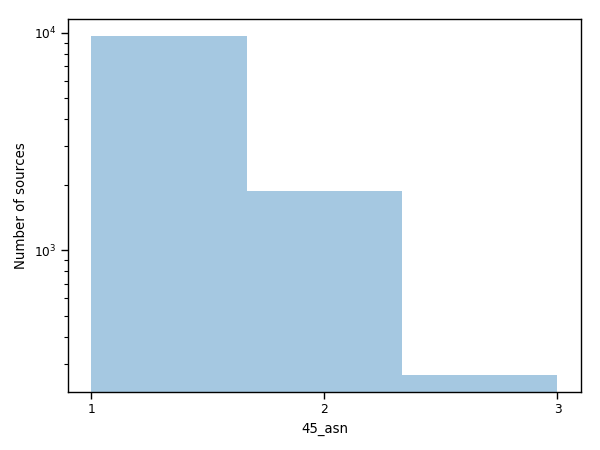

In [15]:
ig = plt.figure(figsize=(6,4.5))
ax = sns.distplot(good_data['45_asn'] ,kde=False, bins=3)
#ax = sns.countplot(pr_data[param_best_name], color='steelblue')
ax.set_yscale('log')
ax.set_ylabel('Number of sources')
plt.tight_layout()
ax.set_xticks([1,2,3])
#save_name = str('hist_'+param_best_name+'.pdf')
#plt.savefig(save_name, bbox_inches='tight')





# Can employ visualisation technique above to check mean coordinate

# Test to see if mean coordinates are working

In [ ]:
good_asn_data[0:6].show_in_notebook()

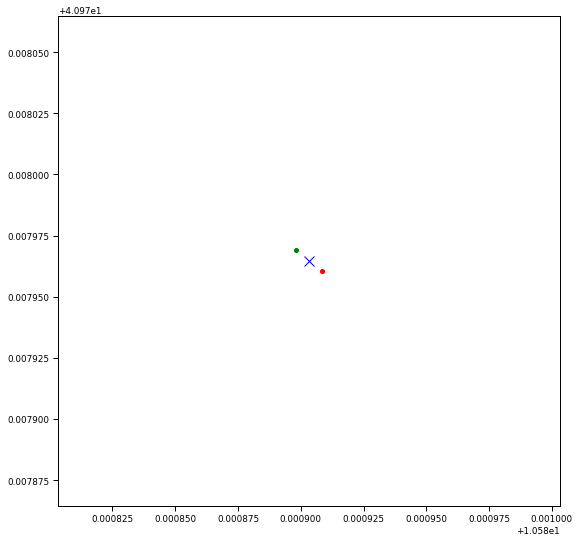

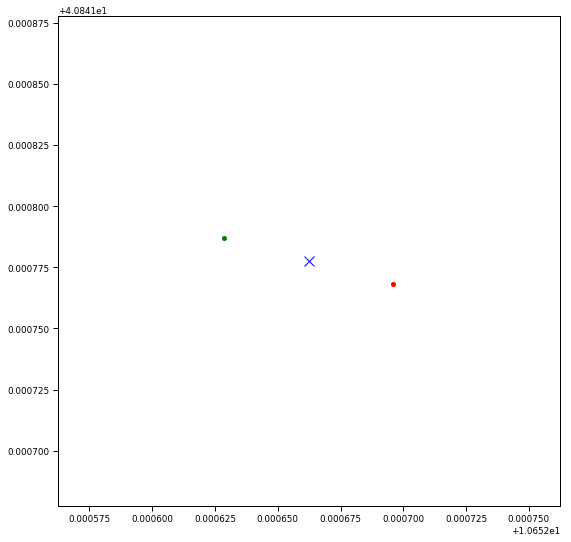

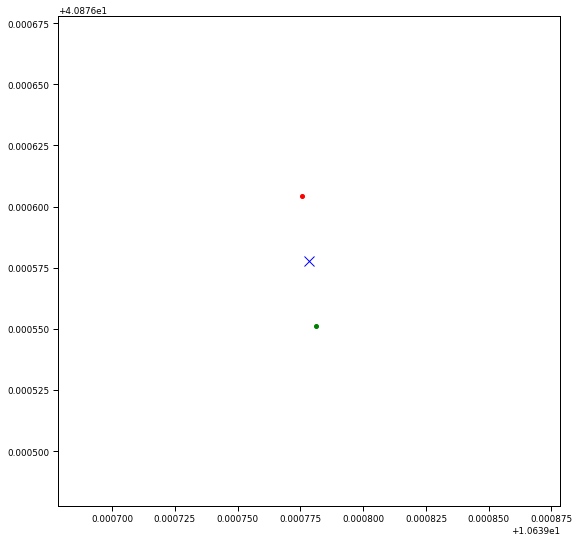

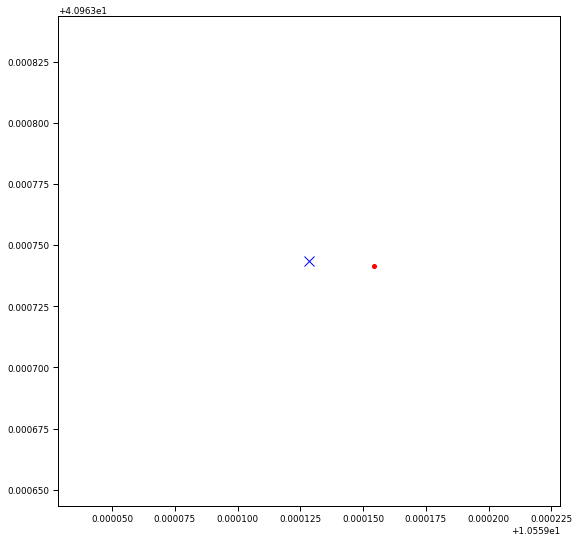

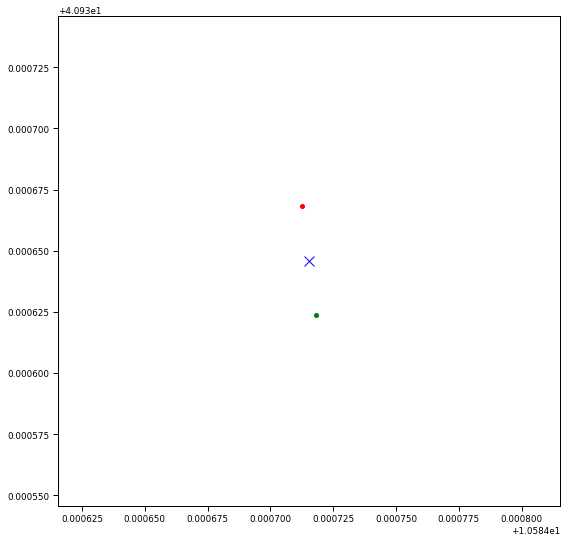

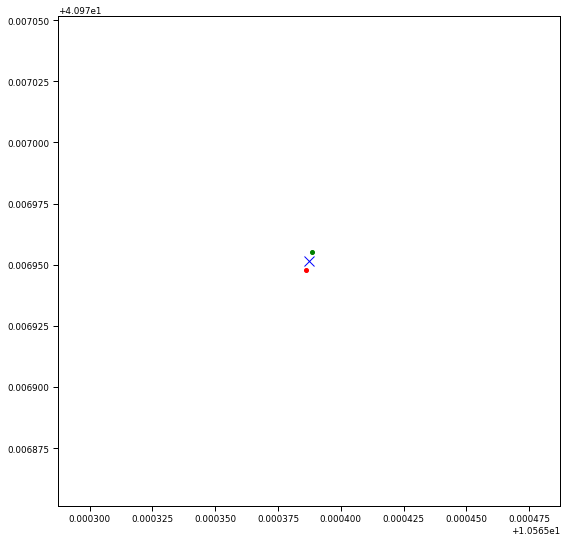

In [22]:
%matplotlib inline

# NB: This function assumes the 3rd coordinate is -99 (not used)
for i in range(6):
    plt.figure(figsize=(9,9))
    x1,y1 = good_asn_data['S2_F1_RA'][i],good_asn_data['S2_F1_DEC'][i]
    x2,y2 = good_asn_data['S2_F3_RA'][i],good_asn_data['S2_F3_DEC'][i]
    x3,y3 = good_asn_data['RA'][i],good_asn_data['DEC'][i]

    plt.plot(x1,y1,'ro',ms=4)
    plt.plot(x2,y2,'go',ms=4)
    plt.plot(x3,y3,'bx',ms=10)
    stretch = 0.0001
    plt.xlim(x3-stretch,x3+stretch)
    plt.ylim(y3-stretch,y3+stretch)